#### 加載並檢查數據
數據集中的每一行對應一朵不同的花。 有四種測量值：萼片長度和寬度，以及花瓣的長度和寬度。 我們還跟踪相應的物種。

In [9]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [12]:
# Path of the file to read
iris_filepath = "iris.csv"

# Read the file into a variable iris_data
iris_data = pd.read_csv(iris_filepath, index_col="Id")

# Print the first 5 rows of the data
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### 直方圖 (Histograms)
假設我們想創建一個直方圖來查看鳶尾花中花瓣長度的變化。 我們可以使用 sns.distplot 命令來做到這一點。

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

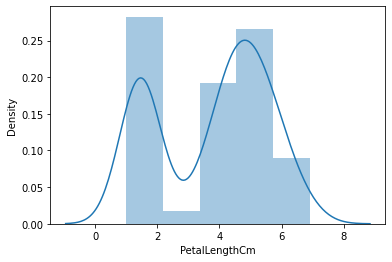

In [14]:
# Histogram 
sns.distplot(a=iris_data['PetalLengthCm'], kde=True)

我們使用兩條附加信息自定義命令的行為：

1. a= 選擇我們想要繪製的列（在本例中，我們選擇了“花瓣長度（cm）”）。
2. kde=False 是我們在創建直方圖時總是提供的東西，因為省略它會創建一個稍微不同的圖。

#### 密度圖 (Density plots)
下一種圖是核密度估計 (KDE) 圖。 如果您不熟悉 KDE 圖，您可以將其視為平滑的直方圖。

要製作 KDE 繪圖，我們使用 sns.kdeplot 命令。 設置 shade=True 為曲線下方的區域著色（並且 data= 具有與我們製作上面的直方圖時相同的功能）。

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

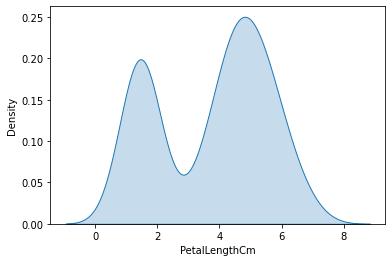

In [16]:
# KDE plot 
sns.kdeplot(data=iris_data['PetalLengthCm'], shade=True)

二維 KDE 圖
創建 KDE 圖時，我們不限於單列。 我們可以使用 **sns.jointplot** 命令創建二維 (2D) KDE 圖。

在下圖中，顏色編碼向我們展示了我們看到萼片寬度和花瓣長度的不同組合的可能性，圖中較暗的部分更有可能。

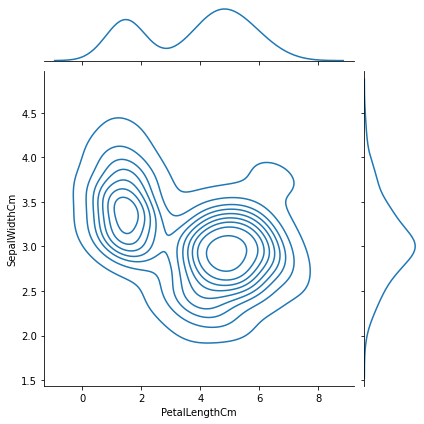

In [17]:
# 2D KDE plot
sns.jointplot(x=iris_data['PetalLengthCm'], y=iris_data['SepalWidthCm'], kind="kde")

In [ ]:
請注意，除了中心的 2D KDE 圖，

1.圖頂部的曲線是x軸上數據的KDE圖（在本例中為iris_data['Petal Length (cm)']），以及
2.圖右邊的曲線是y軸上數據的KDE圖（本例中為iris_data['Sepal Width (cm)']）。

#### 彩色編碼圖(Color-coded plots)
在教程的下一部分中，我們將創建圖表以了解物種之間的差異。 為了實現這一點，我們首先將數據集分成三個單獨的文件，每個物種一個。

In [19]:
# Paths of the files to read
iris_set_filepath = "iris_setosa.csv"
iris_ver_filepath = "iris_versicolor.csv"
iris_vir_filepath = "iris_virginica.csv"

# Read the files into variables 
iris_set_data = pd.read_csv(iris_set_filepath, index_col="Id")
iris_ver_data = pd.read_csv(iris_ver_filepath, index_col="Id")
iris_vir_data = pd.read_csv(iris_vir_filepath, index_col="Id")

# Print the first 5 rows of the Iris versicolor data
iris_ver_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


在下面的代碼單元格中，我們通過使用 sns.distplot 命令（如上）三次為每個物種創建不同的直方圖。 我們使用 label= 來設置每個直方圖在圖例中的顯示方式。

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Petal Lengths, by Species')

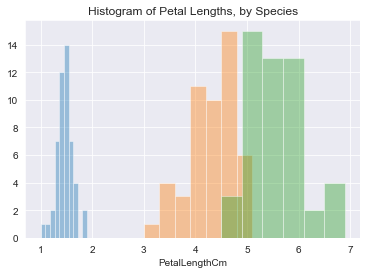

In [30]:
# Histograms for each species
sns.set_style("darkgrid") 
# Seaborn 有五個不同的主題：（1）“darkgrid”、（2）“whitegrid”、（3）“dark”、（4）“white”和（5）“ticks”，
# 只需要使用類似的命令 到上面代碼單元格中的那個（填充了所選主題）來更改它。
sns.distplot(a=iris_set_data['PetalLengthCm'], label="Iris-setosa", kde=False)
sns.distplot(a=iris_ver_data['PetalLengthCm'], label="Iris-versicolor", kde=False)
sns.distplot(a=iris_vir_data['PetalLengthCm'], label="Iris-virginica", kde=False)

# Add title
plt.title("Histogram of Petal Lengths, by Species")

在這種情況下，圖例不會自動出現在繪圖上。 為了強制它顯示（對於任何繪圖類型），我們總是可以使用 plt.legend()。

我們還可以使用 sns.kdeplot（如上）為每個物種創建 KDE 圖。 同樣，label= 用於設置圖例中的值。

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

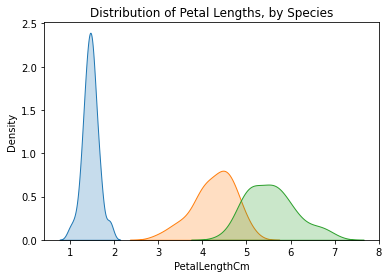

In [21]:
# KDE plots for each species
sns.kdeplot(data=iris_set_data['PetalLengthCm'], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data['PetalLengthCm'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data['PetalLengthCm'], label="Iris-virginica", shade=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")

在圖中可以看到的一個有趣模式是，這些植物似乎屬於兩組之一，其中雜色鳶尾和維吉尼亞鳶尾的花瓣長度似乎具有相似的值，而山茱萸本身就屬於一個類別。

事實上，根據這個數據集，我們甚至可以僅通過查看花瓣長度就可以將任何鳶尾植物歸類為 Iris setosa（而不是 Iris versicolor 或 Iris virginica）：如果鳶尾花的花瓣長度小於 2cm，最有可能是Iris setosa！